### ANDMED

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('train_data80.csv')
df_val = pd.read_csv('val_data10.csv')
df_test = pd.read_csv('test_data10.csv')

In [5]:
len(df_train)

31800

In [26]:
len(df_val)

3976

In [27]:
len(df_test)

3976

# RoBERTa

In [6]:
# Make cuisine categories numerical
cuisines = pd.DataFrame(sorted(df_train.cuisine.unique()))

cuisines["label"] = list(range(len(cuisines)))
cuisines.columns = ["cuisine", "label"]

# Give a numeric label for each cuisine in the df
labels = []
for i in range(len(df_train)):
  labels.append(cuisines.loc[cuisines['cuisine'] == df_train.cuisine[i], 'label'].item())

df_train["c_label"] = labels

In [7]:
# X y split

X_train = df_train["ingredients"]
y_train = df_train["c_label"]

In [8]:
training = pd.DataFrame(columns = ["text", "label"])
training["text"] = X_train
training["label"] = y_train

#training = pd.DataFrame(X_train, y_train, axis=1)

In [9]:
# VALIDATION data

# Give a numeric label for each cuisine in the df
v_labels = []
for i in range(len(df_val)):
    v_labels.append(cuisines.loc[cuisines['cuisine'] == df_val.cuisine[i], 'label'].item())

df_val["c_label"] = v_labels

# X y split

X_train = df_train["ingredients"]
y_train = df_train["c_label"]

valing = pd.DataFrame(columns = ["text", "label"])
valing["text"] = X_train
valing["label"] = y_train

# Mudel oma dataga

In [8]:
#!pip install simpletransformers
from simpletransformers.classification import ClassificationModel

In [22]:
#!pip install torch

In [9]:
# Create a ClassificationModel
model2 = ClassificationModel('roberta', 'roberta-base', num_labels=20, use_cuda=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_p

In [10]:
# Train the model
model2.train_model(training, eval_df=valing, evaluate_during_training=True)

C:\Users\krist\anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:593: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


(3975, 1.2290548964585148)

In [11]:
import pickle

# Save the Model to file in the current working directory

p_filename = "roberta_trained_801010.pkl"  

with open(p_filename, 'wb') as file:  
    pickle.dump(model2, file)
    
# Save the model to disk

filename = 'roberta_trained_801010.sav'
pickle.dump(model2, open(filename, 'wb'))

In [10]:
import pickle
model = pickle.load(open("roberta_trained_801010.pkl", 'rb'))

In [11]:
df_val

# Make cuisine categories numerical
#cuisines = pd.DataFrame(sorted(df_train.cuisine.unique()))

#cuisines["label"] = list(range(len(cuisines)))
#cuisines.columns = ["cuisine", "label"]

val_df = pd.DataFrame()
#val_df.columns = ["text", "labels"]

# Give a numeric label for each cuisine in the df
vlabels = []
for i in range(len(df_val)):
    vlabels.append(cuisines.loc[cuisines['cuisine'] == df_val.cuisine[i], 'label'].item())

val_df["labels"] = vlabels
val_df["text"] = df_val["ingredients"]

In [12]:
val_df

,labels,text
0,9,spaghetti cook and drain egg beef shredded m...
1,11,sesame seed tuna wasabi french bread olive oi...
2,5,ladyfinger confectioner sugar heavy cream rhub...
3,9,hot pepper sauce yellow bell pepper dill pickl...
4,13,masa harina kosher salt
...,...,...
3971,19,table salt spring onion vermicelli noodle chic...
3972,3,chicken broth water vegetable oil wonton noodl...
3973,13,pepper condensed cream of mushroom soup instan...
3974,4,pork belly thai chile oil shrimp paste salt on...


In [13]:
model2 = model

In [14]:
# EVALUATION
from sklearn.metrics import accuracy_score
#result, model_outputs, wrong_predictions = model.eval_model(df_val)
result_v, model_outputs_v, wrong_predictions_v = model2.eval_model(val_df, acc=accuracy_score)

In [15]:
print(result_v)
print(model_outputs_v)
print(wrong_predictions_v)

{'mcc': 0.691413710109588, 'acc': 0.7225855130784709, 'eval_loss': 0.9096547451612336}
[[-0.69810688 -0.73519051  0.55650949 ... -0.28367573 -1.28097415
  -1.00076413]
 [-0.4750582  -0.36269265 -1.02048695 ... -1.08900952 -0.72275937
  -0.07212764]
 [-1.49207616  2.71202207 -0.22788925 ... -0.13081819 -2.66800761
  -2.11556506]
 ...
 [ 0.93611449 -1.62346482 -0.6271565  ...  1.25652695 -0.40515447
  -0.12074825]
 [ 1.83255887 -1.11796832 -1.60414159 ... -0.92154264  4.88461304
   2.55238533]
 [-1.62075591 -1.04522395 -1.40456486 ... -1.49516165  1.31356883
   1.90957963]]
[]


In [16]:
test_df = pd.DataFrame()
#val_df.columns = ["text", "labels"]

# Give a numeric label for each cuisine in the df
tlabels = []
for i in range(len(df_test)):
    tlabels.append(cuisines.loc[cuisines['cuisine'] == df_test.cuisine[i], 'label'].item())

test_df["labels"] = tlabels
test_df["text"] = df_test["ingredients"]

In [17]:
# TEST EVALUATION
result, model_outputs, wrong_predictions = model2.eval_model(test_df, acc=accuracy_score)

In [18]:
print(result)
print(model_outputs)
print(wrong_predictions)

{'mcc': 0.7100263004912994, 'acc': 0.7401911468812877, 'eval_loss': 0.8606825034795572}
[[ 1.11394024 -1.54576528  0.07372223 ...  2.06238103 -1.40272331
  -1.19887626]
 [-1.51588011 -1.1982466  -1.35017288 ... -0.78705865  1.05722046
   1.32556367]
 [-0.74245077 -0.61054689  0.80605429 ...  0.07527485 -1.66947532
  -1.12058568]
 ...
 [-1.40332103 -1.17960024 -1.40411282 ... -0.82452559  0.78816444
   1.29061556]
 [ 1.98254716 -1.0266124  -1.44893181 ... -0.79970622  5.18081617
   1.87206984]
 [ 0.48438621 -1.27532625 -0.34894466 ...  1.37334716 -1.01499224
  -1.07586718]]
[]


In [19]:
# RESULTS TIMEEE
X_test = df_test["ingredients"]
X_test_list = []
for i in range(len(df_test)):
    X_test_list.append([df_test.ingredients[i]])
    
X_test_list = str(X_test_list)
print(X_test)
#predictions, raw_outputs = model.predict(X_test)

0       black pepper red pepper flake salt lime juice ...
1       fresh ginger garlic clove chinese mustard red ...
2       fresh rosemary parmigiano reggiano cheese drie...
3       great northern bean chili  salsa ripe olive  g...
4       water poppy seed green chilies garam masala sa...
                              ...                        
3971    basil leaf caciocavallo vine tomato extra virg...
3972    cooking spray pepper salt russet potato large egg
3973    water  red pepper flake corn starch dark soy s...
3974    fresh cilantro ginger garlic clove low sodium ...
3975    cream of chicken soup sour cream cooked chicke...
Name: ingredients, Length: 3976, dtype: object


In [20]:
X_test_data = [X_test[i] for i in range(len(X_test))]
#X_test_data

In [21]:
predictions_test, raw_outputs_test = model2.predict(X_test_data)
predictions_test

array([13,  3,  9, ...,  3, 18, 13], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(np.array(test_df.labels), predictions_test))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42        53
           1       0.12      0.01      0.02        87
           2       0.75      0.75      0.75       138
           3       0.77      0.79      0.78       281
           4       0.47      0.34      0.39        74
           5       0.48      0.63      0.55       245
           6       0.73      0.73      0.73       124
           7       0.80      0.91      0.85       295
           8       0.42      0.47      0.44        68
           9       0.82      0.84      0.83       816
          10       0.82      0.61      0.70        54
          11       0.79      0.75      0.77       138
          12       0.57      0.57      0.57        76
          13       0.89      0.91      0.90       635
          14       0.72      0.67      0.69        94
          15       0.69      0.28      0.40        39
          16       0.71      0.79      0.75       435
          17       0.55    

MASHED POTATOES TEST

In [23]:
# TESTING KARTULIPUDER
predictions_mashpotato, raw_outputs_mashpotato = model2.predict(["potatoes, milk, butter, salt, pepper"])
predictions_mashpotato

array([16], dtype=int64)

In [24]:
raw_outputs_mashpotato

array([[-0.02944121,  1.47348607, -0.07328367, -1.48531544, -0.50710297,
         0.73649818, -1.40217972,  0.55976963,  1.79355049,  0.51681912,
        -0.08157461, -0.35387492, -2.38070273,  1.77538383, -1.15758526,
         0.30034125,  4.25680351, -0.9443177 , -2.11237025, -2.50269866]])

CONFUSION MATRIX

In [44]:
test_labels = []
predicted_labels = []
for i in range(len(test_df)):
    test_labels.append(cuisines.loc[cuisines['label'] == test_df.labels[i], 'cuisine'].item())
    predicted_labels.append(cuisines.loc[cuisines['label'] == predictions_test[i], 'cuisine'].item())   

C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


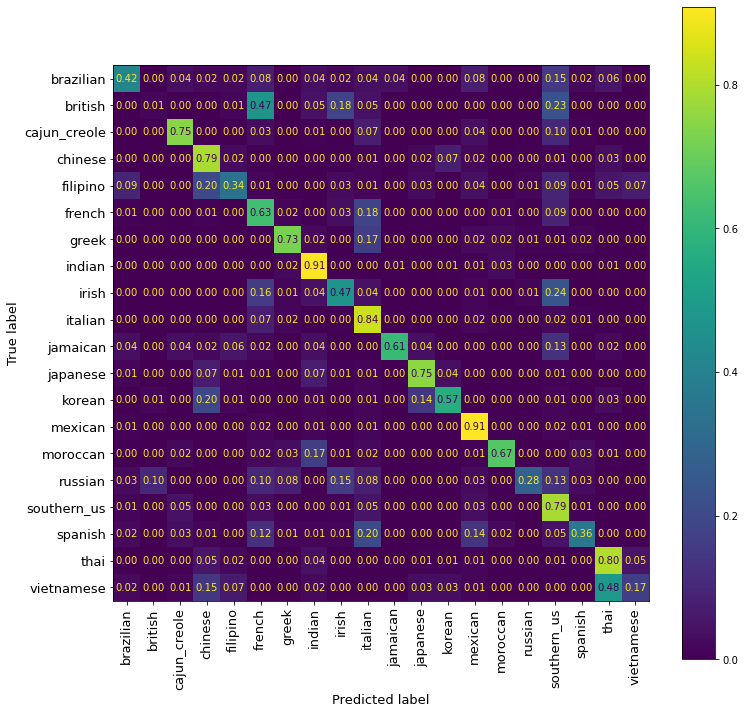

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = list(cuisines.cuisine)

conf_mat = confusion_matrix(test_labels, predicted_labels, labels, normalize = "true")
cmd = ConfusionMatrixDisplay(conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(12,12))
cmd.plot(ax=ax, values_format = '.2f')
ax.tick_params(axis='x', rotation=90)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
    
fig.savefig('ROBERTAconf_mat.png')